# Haberman's Survival Data Set
## Source : https://www.kaggle.com/gilsousa/habermans-survival-data-set


# LOADING THE DATA INTO DATAFRAME

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman.csv",index_col=False)

In [30]:
print(haberman)

     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    30  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]


In [31]:
haberman.columns = ['age','op_year','axil_nodes','surv_status']

In [32]:
print (haberman)

     age  op_year  axil_nodes  surv_status
0     30       62           3            1
1     30       65           0            1
2     30       59           2            1
3     31       65           4            1
4     33       58          10            1
..   ...      ...         ...          ...
300   75       62           1            1
301   76       67           0            1
302   77       65           3            1
303   78       65           1            2
304   83       58           2            2

[305 rows x 4 columns]


In [33]:
haberman.head()

,age,op_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,30,59,2,1
3,31,65,4,1
4,33,58,10,1


In [34]:
print(haberman.columns)

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [35]:
print(haberman.shape)

(305, 4)


305 rows <br/>
4 columns

In [37]:
haberman['surv_status'].value_counts()

1    224
2     81
Name: surv_status, dtype: int64

## Observation
Imbalanced Data as the clasification variable data count is not equal

In [38]:
haberman.loc[-1] = [30, 64,1,1]  # adding a row
haberman.index = haberman.index + 1  # shifting index
haberman.sort_index(inplace=True) 

In [39]:
print(haberman)

     age  op_year  axil_nodes  surv_status
0     30       64           1            1
1     30       62           3            1
2     30       65           0            1
3     30       59           2            1
4     31       65           4            1
..   ...      ...         ...          ...
301   75       62           1            1
302   76       67           0            1
303   77       65           3            1
304   78       65           1            2
305   83       58           2            2

[306 rows x 4 columns]


# General Overview of Statistics

In [40]:
haberman.describe()

,age,op_year,axil_nodes,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.454248,62.852941,4.026144,1.264706
std,10.810114,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Observation
Age range is 30-83<br/>
Average Age is 52 approx.
25 % people have 0 nodes<br/>
50% people have 1 node<br/>
25% people have 3 nodes atmost<br/>
75% people have atmost 4 nodes <br/>


# Univariate Analysis

## Histograms and PDF

In [42]:
import warnings
warnings.filterwarnings("ignore")

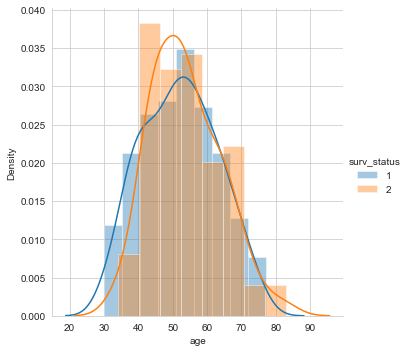

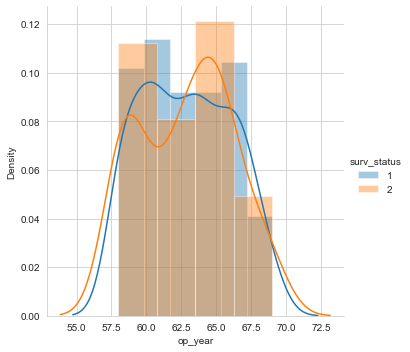

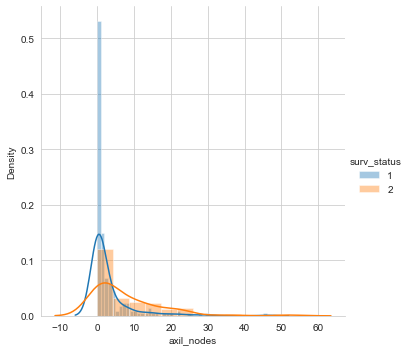

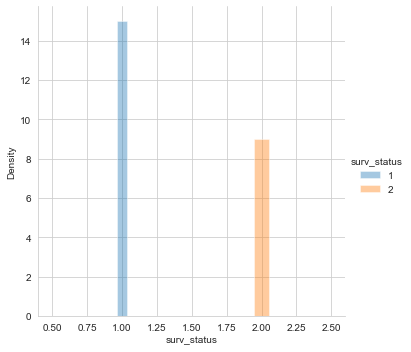

In [46]:
for c in haberman.columns:
    sns.set_style("whitegrid")
    sns.FacetGrid(haberman,hue='surv_status',size=5)\
       .map(sns.distplot,c)\
       .add_legend()
plt.show()

## Observations
Deaths were consistent from 1958-1966 and there is a sudden drop of 50% from 1966<br/>
There are no deaths in the age group 30-34<br/>
There is no survivor after 78<br/>
There are more survivors with only 1 node than deceased<br/> 


In [47]:
#Dividing into two seperate datasets
haberman_s = haberman.loc[haberman['surv_status']==1]
haberman_d = haberman.loc[haberman['surv_status']==2]

In [48]:
print(haberman_s)
print(haberman_d)

     age  op_year  axil_nodes  surv_status
0     30       64           1            1
1     30       62           3            1
2     30       65           0            1
3     30       59           2            1
4     31       65           4            1
..   ...      ...         ...          ...
298   73       68           0            1
300   74       63           0            1
301   75       62           1            1
302   76       67           0            1
303   77       65           3            1

[225 rows x 4 columns]
     age  op_year  axil_nodes  surv_status
7     34       59           0            2
8     34       66           9            2
24    38       69          21            2
34    39       66           0            2
43    41       60          23            2
..   ...      ...         ...          ...
286   70       58           4            2
293   72       63           0            2
299   74       65           3            2
304   78       65           1 

In [49]:
haberman_s['age'].value_counts()

52    10
50    10
54     9
38     9
55     8
49     8
47     8
57     8
63     7
41     7
42     7
43     7
58     7
59     7
37     6
65     6
61     6
45     6
64     5
34     5
53     5
70     5
56     5
39     5
62     4
67     4
60     4
30     4
48     4
44     4
51     4
46     3
40     3
66     3
69     3
72     3
68     2
36     2
35     2
33     2
73     2
75     1
76     1
31     1
74     1
71     1
77     1
Name: age, dtype: int64

In [50]:
haberman_d['age'].value_counts()

53    6
52    4
54    4
43    4
46    4
65    4
47    3
61    3
41    3
44    3
45    3
57    3
48    3
62    3
34    2
66    2
67    2
70    2
60    2
55    2
56    2
51    2
50    2
49    2
42    2
59    1
38    1
63    1
69    1
39    1
72    1
74    1
78    1
83    1
Name: age, dtype: int64

## PDF and CDF

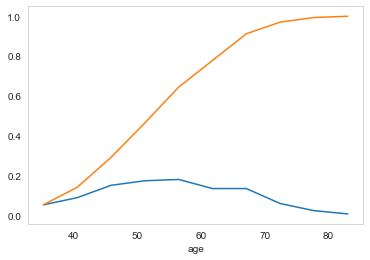

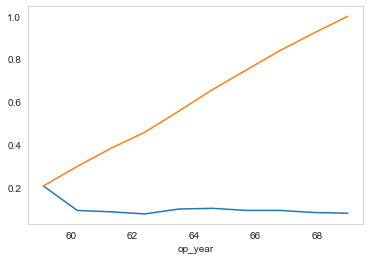

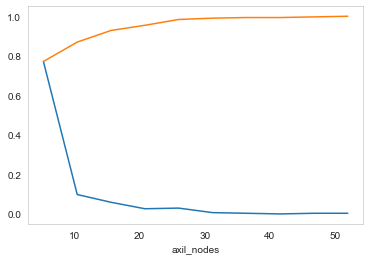

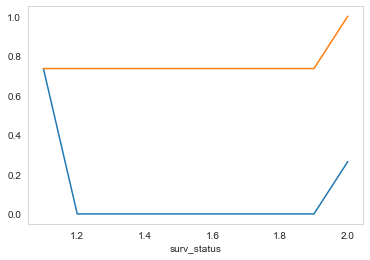

In [51]:
for column in haberman.columns:
    counts, bin_edges = np.histogram(haberman[column],bins=10,density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.grid()
    plt.xlabel(column)
    plt.show()

In [69]:
haberman['op_year'].value_counts()

58    36
64    31
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: op_year, dtype: int64

## Observations
50% of the operations were took place in the span of 1958-1963<br/>
highest number of operations took place in the year 1958 i.e 36

In [66]:
df = haberman.loc[haberman['op_year']==58]
df['surv_status'].value_counts()

12

Out of 36 only 24 survived

In [71]:
haberman['op_year'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

In [83]:
for v in haberman["op_year"].unique():
    dff = haberman.loc[haberman['op_year']==v]
    print(v,dff['surv_status'].value_counts()[1]/(dff['surv_status'].value_counts()[1]+dff['surv_status'].value_counts()[2]))

64 0.7419354838709677
62 0.6956521739130435
65 0.5357142857142857
59 0.6666666666666666
58 0.6666666666666666
60 0.8571428571428571
66 0.7857142857142857
61 0.8846153846153846
67 0.84
63 0.7333333333333333
69 0.6363636363636364
68 0.7692307692307693


## Observation
We can obswerve that the success rate of operations in 1961 is highest and is lowest in 1965

## Box Plots

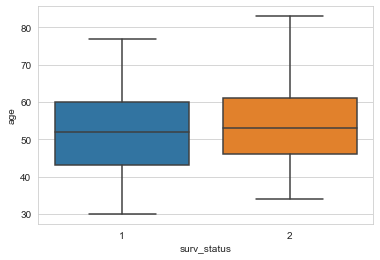

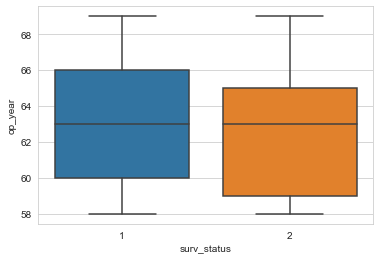

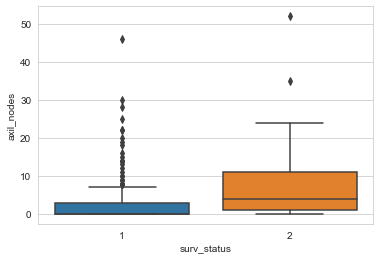

In [84]:
for column in haberman.columns[:-1]:
    sns.boxplot(x = 'surv_status', y = column, data = haberman)
    plt.show()

# Bivariate Analysis

## Pair Plots

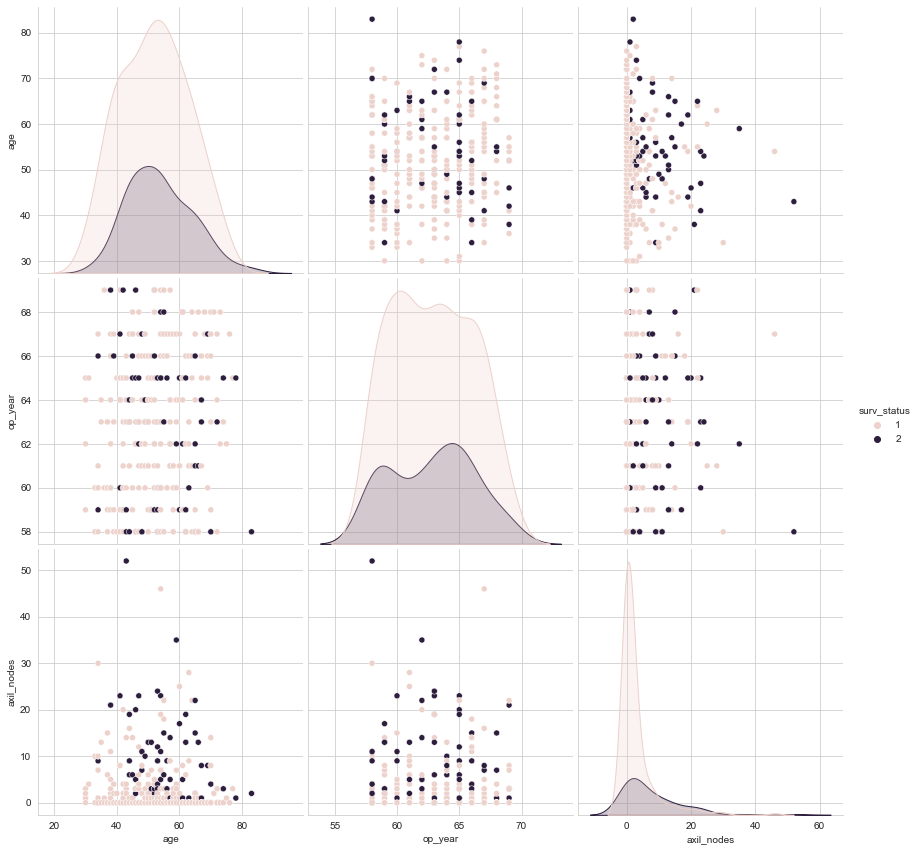

In [85]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue ="surv_status", size =4)
plt.show()

## Observations
There is more overlapping in the haberman data and the data set is too imbalanced<br/>
But the node vs age plot is somewhat seperable when compared to the other plots.